#  Projet de machine learning sur les Etats de Prêt d'une Banque

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importation de notre dataset
df=pd.read_csv("archive(4)/training_set.csv")

### Visualisation de l'entête de notre dataset

In [3]:
# visualisation de l'entête de nos données
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


## 1.Exploration des données

### 1.b) Analyse de forme

#### . Signification des variables
  - **Loan_ID**: est l'identifiant(numéro de credit) de l'emprunteur
  - __Gender__: est le sex de l'emprunteur
  - __Married__: est la situation matrimoniale
  - __Self_Employed__: montre si l'emprunteur travail pour son compte ou non
  - __ApplicantIncom__: est le revenu de l'emprunteur
  - __CoapplicantIncome__: est le revenue du co-demandeur
  - __Dependants__: le nombre d'enfant de la personne
  - __Education__: montre si l'emprunteur a fait des etudes ou non 
  - __loanAmount__: Le Montant demander
  - __Loan_Amount_Term__: Durée du Pret
  - __Credit_History__: historique du credit de l'empunteur
  - __Property_Area__: zone d'habitation de l'emprunteur
  - __Loan_Status__:  Etat du Prêt

#### -Variable Target est Loan_Statut

#### - Dimension du Dataset

In [4]:
df.shape

(614, 13)

#### -valeur manquante

In [5]:
# visualisation des valeurs manquantes
df.isna().sum()/df.shape[0]

Loan_ID              0.000000
Gender               0.024430
Married              0.004886
Dependents           0.024430
Education            0.001629
Self_Employed        0.052117
ApplicantIncome      0.003257
CoapplicantIncome    0.001629
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<AxesSubplot:>

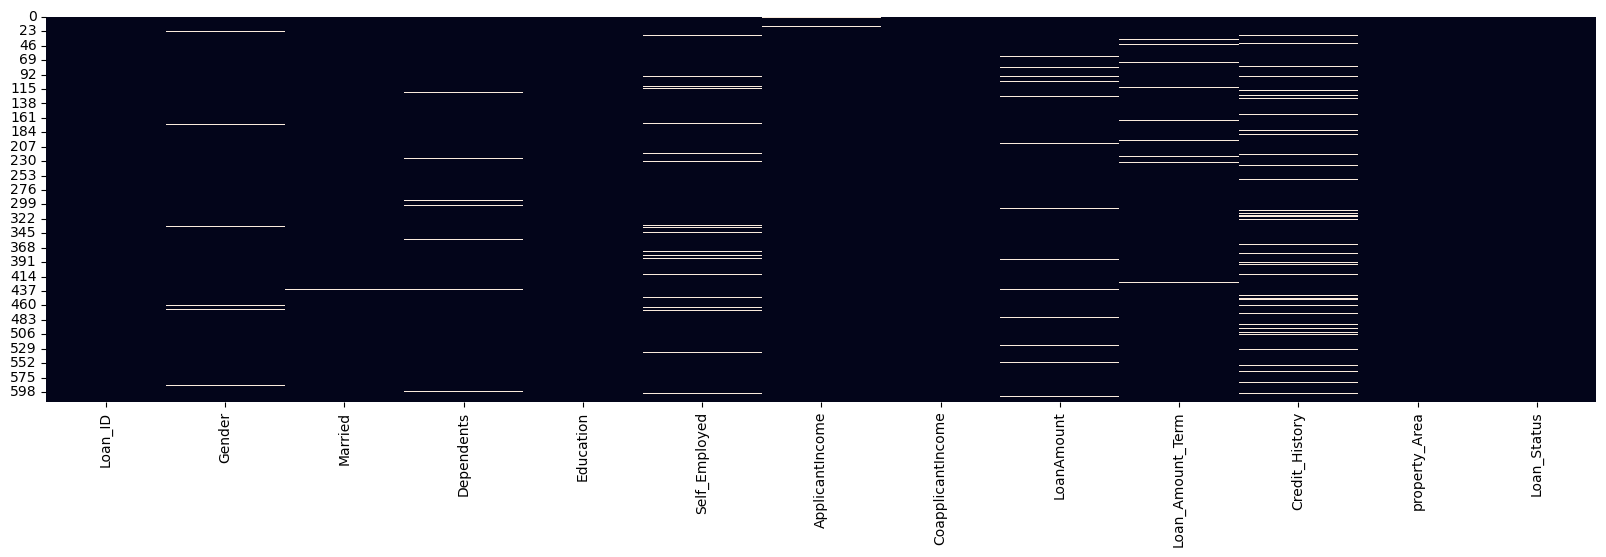

In [6]:
# visualisation des valeurs manquantes sur une figure
plt.figure(figsize=(20,5))
sns.heatmap(df.isna(),cbar=False)

En examinant les valeurs manquantes dans notre jeu de données, nous constatons que la plupart des variables ont très peu de valeurs manquantes, soit moins de 5%. Par exemple, la variable "Gender" présente des valeurs manquantes pour environ 2,44% des cas, et la variable "Credit_History" pour environ 8,14% des cas. Ces pourcentages relativement bas indiquent que notre ensemble de données est assez complet, ce qui est encourageant pour notre analyse. Cependant, il est essentiel de décider judicieusement de la manière de traiter ces valeurs manquantes pour garantir l'exactitude de nos résultats tout au long de l'analyse.

In [7]:
# determination des types de valeurs
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area         object
Loan_Status           object
dtype: object

On a deux types de variables qui sont : variables quantitatives et qualitatives

### 1.b) Analyse de fond

### Valeur Aberante

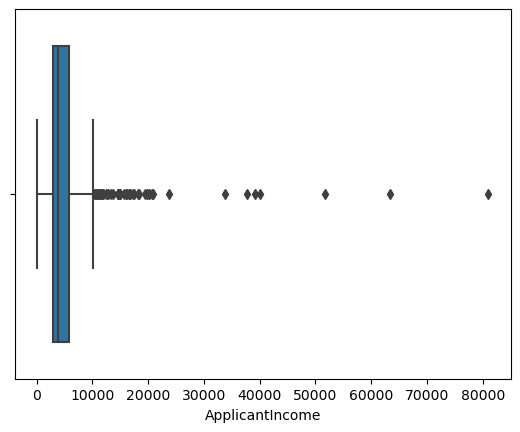

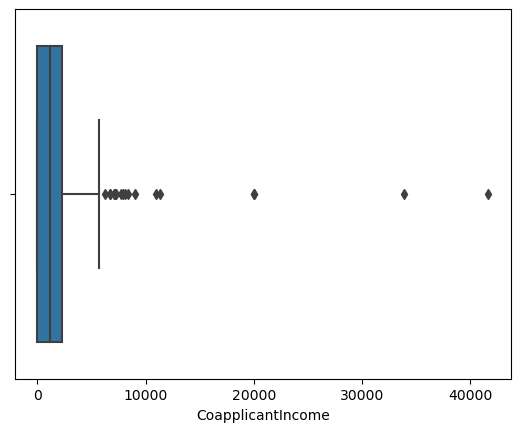

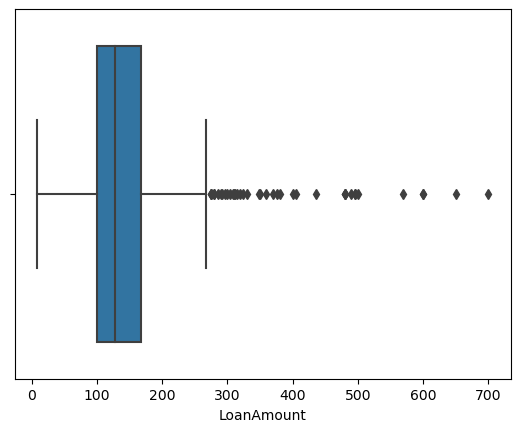

In [12]:
column_number=['ApplicantIncome','CoapplicantIncome','LoanAmount']

for col in column_number:
    sns.boxplot(x=df[col])
    plt.show()

In [13]:
Q1=df['LoanAmount'].quantile(0.25)
Q3=df['LoanAmount'].quantile(0.75)

IQR=Q3-Q1
borne_inferieur=Q1-1.5*IQR
borne_superieur=Q3+1.5*IQR

df_aberante_LoanAmount=df[(df['LoanAmount']<borne_inferieur) | (df['LoanAmount']>borne_superieur)]

In [14]:
df_aberante_LoanAmount.shape

(39, 13)

In [15]:
Q1=df['ApplicantIncome'].quantile(0.25)
Q3=df['ApplicantIncome'].quantile(0.75)

IQR=Q3-Q1
borne_inferieur=Q1-1.5*IQR
borne_superieur=Q3+1.5*IQR

df_aberante_ApplicantIncome=df[(df['ApplicantIncome']<borne_inferieur) | (df['ApplicantIncome']>borne_superieur)]

In [16]:
df_aberante_ApplicantIncome.shape

(50, 13)

In [17]:
Q1=df['CoapplicantIncome'].quantile(0.25)
Q3=df['CoapplicantIncome'].quantile(0.75)

IQR=Q3-Q1
borne_inferieur=Q1-1.5*IQR
borne_superieur=Q3+1.5*IQR

df_aberante_CoapplicantIncome=df[(df['CoapplicantIncome']<borne_inferieur) | (df['CoapplicantIncome']>borne_superieur)]

In [18]:
df_aberante_CoapplicantIncome.shape

(18, 13)

Ces calculs représentent la détection des valeurs aberrantes (outliers) pour les colonnes 'LoanAmount', 'ApplicantIncome' et 'CoapplicantIncome'.

Pour 'LoanAmount':

    Il y a 39 valeurs aberrantes détectées, avec des valeurs de prêts soit très basses, soit très élevées.

Pour 'ApplicantIncome':

    50 valeurs aberrantes ont été trouvées dans la colonne 'ApplicantIncome'. Cela indique des revenus d'emprunteurs soit très faibles, soit très élevés.

Pour 'CoapplicantIncome':

    18 valeurs aberrantes ont été détectées dans la colonne 'CoapplicantIncome', montrant des revenus de co-demandeurs soit très bas, soit très élevés.

Ces valeurs aberrantes peuvent avoir un impact significatif sur les analyses et les modèles prédictifs. Il est important de décider comment traiter ces valeurs, que ce soit en les supprimant, en les transformant ou en utilisant des méthodes spécifiques pour les modèles.

ces résultats concernant les valeurs aberrantes ont également été confirmés visuellement à travers nos graphiques. La visualisation des données, en particulier les boîtes à moustaches (boxplots), a été utilisée pour illustrer graphiquement la présence de ces valeurs aberrantes dans les variables LoanAmount, ApplicantIncome, et CoapplicantIncome. Cela renforce nos constatations et souligne l'importance de gérer ces valeurs de manière appropriée lors de l'analyse des données et du développement du modèle.

### - Relation entre Variable

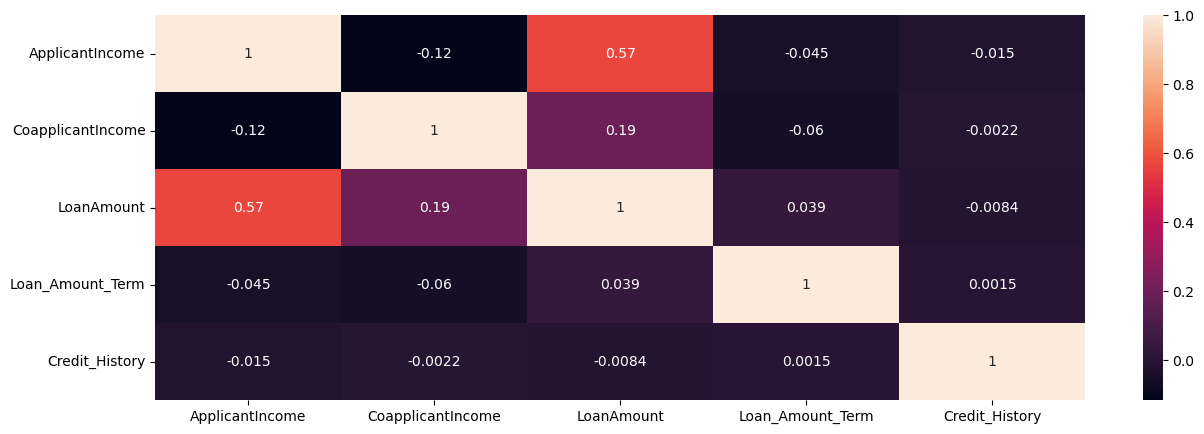

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### . Relation Target/variable

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


#### relation entre Target/Gender

In [30]:
df.groupby(['Gender','Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              150
        Y              337
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

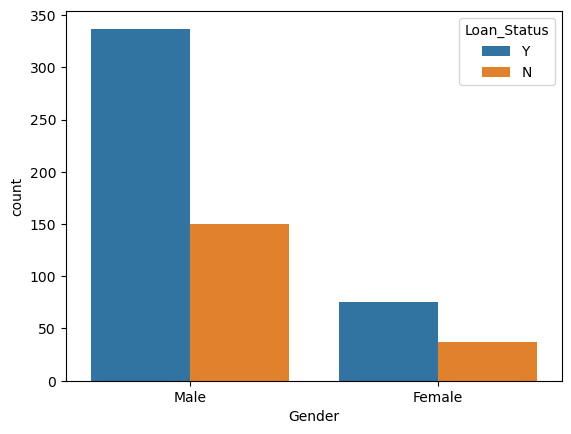

In [25]:
sns.countplot(data=df,x=df['Gender'],hue="Loan_Status")

En observant les données sur l'approbation des prêts en fonction du genre des emprunteurs, une tendance intéressante émerge. La visualisation et Les chiffres révèlent que parmi les emprunteurs masculins, 337 ont obtenu un prêt, tandis que 150 n'ont pas été approuvés. Du côté des emprunteuses féminines, 75 ont obtenu un prêt, tandis que 37 n'ont pas été approuvées. Ces chiffres suggèrent qu'il y a une disparité entre les hommes et les femmes en ce qui concerne l'approbation des prêts, les hommes ayant une plus grande probabilité d'obtenir un prêt par rapport aux femmes dans cet ensemble de données. Cependant, il est important de garder à l'esprit que d'autres variables pourraient également influencer cette tendance, et une analyse plus approfondie serait nécessaire pour tirer des conclusions définitives sur l'impact du genre sur l'octroi de prêts.

#### relation entre Target/Credit_History

In [29]:
df.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N               97
                Y              378
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

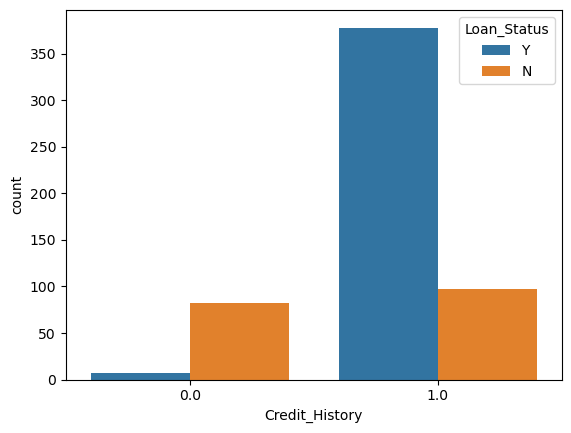

In [31]:

sns.countplot(data=df,x=df['Credit_History'],hue="Loan_Status")


En examinant les données de l'historique de crédit des emprunteurs par rapport à l'approbation des prêts, une conclusion notable se dégage. Parmi les emprunteurs ayant un historique de crédit positif (valeur 1.0), 378 ont obtenu un prêt tandis que seulement 97 ont été refusés. En revanche, pour les emprunteurs ayant un historique de crédit négatif ou absent (valeur 0.0), seuls 7 ont réussi à obtenir un prêt, tandis que 82 ont été refusés. Ces résultats indiquent clairement que l'historique de crédit joue un rôle crucial dans l'approbation des prêts, les emprunteurs ayant un historique de crédit positif ayant beaucoup plus de chances d'obtenir un prêt par rapport à ceux ayant un historique de crédit négatif ou absent. Cependant, il est important de noter que d'autres variables pourraient également influencer cette tendance et nécessiteraient une analyse plus approfondie pour une compréhension complète du processus d'approbation des prêts.

In [32]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y


#### relation entre Target/Education

In [33]:
df.groupby(['Education','Loan_Status'])['Loan_Status'].count()

Education     Loan_Status
Graduate      N              140
              Y              339
Not Graduate  N               52
              Y               82
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

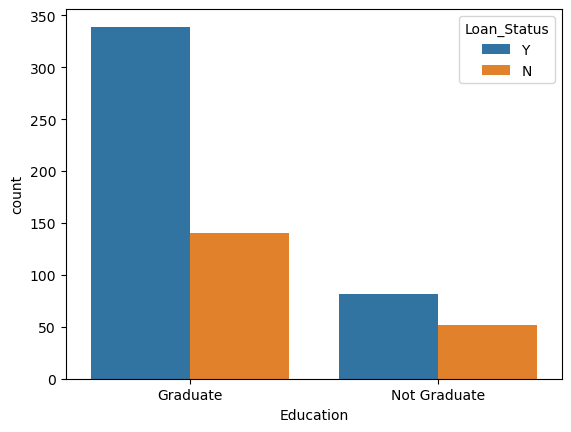

In [34]:
sns.countplot(data=df,x=df['Education'],hue="Loan_Status")

En analysant les données de l'éducation des emprunteurs par rapport à l'approbation des prêts, on observe une différence significative entre les diplômés (Graduate) et les non-diplômés (Not Graduate). Parmi les diplômés, 339 ont obtenu un prêt, tandis que seulement 140 ont été refusés. En revanche, parmi les non-diplômés, seuls 82 ont réussi à obtenir un prêt, tandis que 52 ont été refusés.

Ces résultats suggèrent que les emprunteurs diplômés ont une probabilité plus élevée d'obtenir un prêt par rapport à ceux qui ne sont pas diplômés. L'éducation semble donc jouer un rôle dans le processus d'approbation des prêts, avec une préférence pour les emprunteurs ayant un niveau d'éducation supérieur. Il est important de noter que d'autres variables pourraient également influencer ces résultats et nécessiteraient une analyse approfondie pour une compréhension complète des facteurs d'approbation des prêts.

#### Relation entre Target/Dependents

In [35]:
df.groupby(['Dependents','Loan_Status'])['Loan_Status'].count()

Dependents  Loan_Status
0           N              107
            Y              238
1           N               36
            Y               66
2           N               25
            Y               76
3+          N               18
            Y               33
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

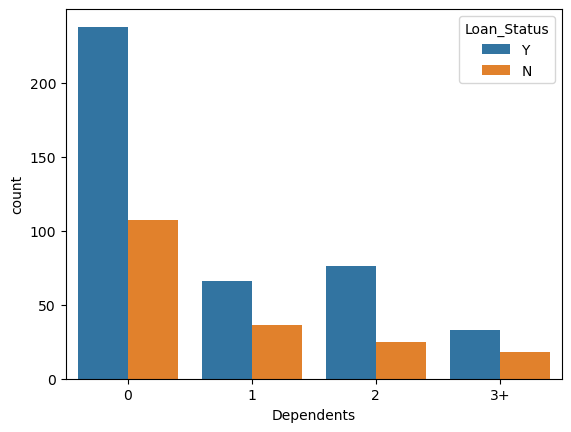

In [36]:
sns.countplot(data=df,x=df['Dependents'],hue="Loan_Status")

L'analyse des dépendants (Dependents) par rapport à l'approbation des prêts révèle des tendances intéressantes. Les emprunteurs sans personnes à charge (0 Dependents) ont un taux d'approbation plus élevé, avec 238 prêts accordés et seulement 107 refusés. À mesure que le nombre de personnes à charge augmente, le nombre de prêts approuvés diminue. Par exemple, pour les emprunteurs ayant 3 personnes à charge ou plus (3+ Dependents), seuls 33 prêts ont été accordés, tandis que 18 ont été refusés.

Ces résultats suggèrent que les emprunteurs sans personnes à charge ont plus de chances d'obtenir un prêt, tandis que les emprunteurs ayant des personnes à charge, en particulier 3 personnes ou plus, ont des chances d'approbation plus faibles. Cependant, il est important de considérer d'autres variables et d'effectuer des analyses plus approfondies pour une compréhension complète de l'influence des personnes à charge sur l'approbation des prêts.

#### - Relation entre Target/LoanAmount

<Figure size 2000x500 with 0 Axes>

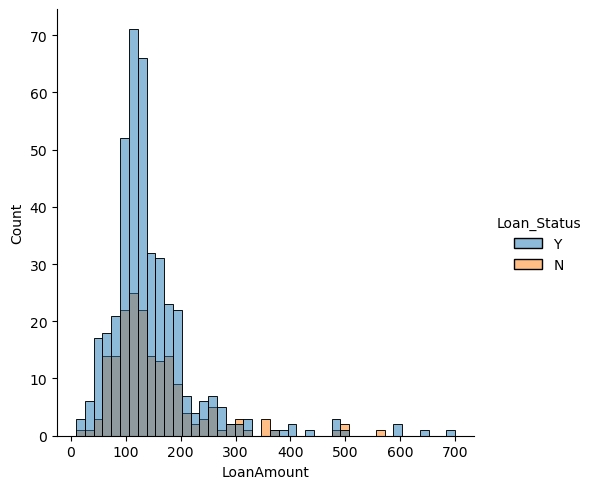

In [38]:
plt.figure(figsize=(20,5))
sns.displot(data=df, x='LoanAmount',hue='Loan_Status')

Il est difficile de discerner une relation claire entre les deux variables à partir du graphique. Cependant, on remarque qu'aucun prêt n'a été refusé pour les demandes de prêts d'une somme supérieure ou égale à 600. Il reste à déterminer si c'est une simple coïncidence. Pour clarifier ce point, nous examinerons attentivement ces cas lors du prétraitement de nos données, notamment lors de la sélection des meilleures variables

#### -Relation Target/Coapplicantincom

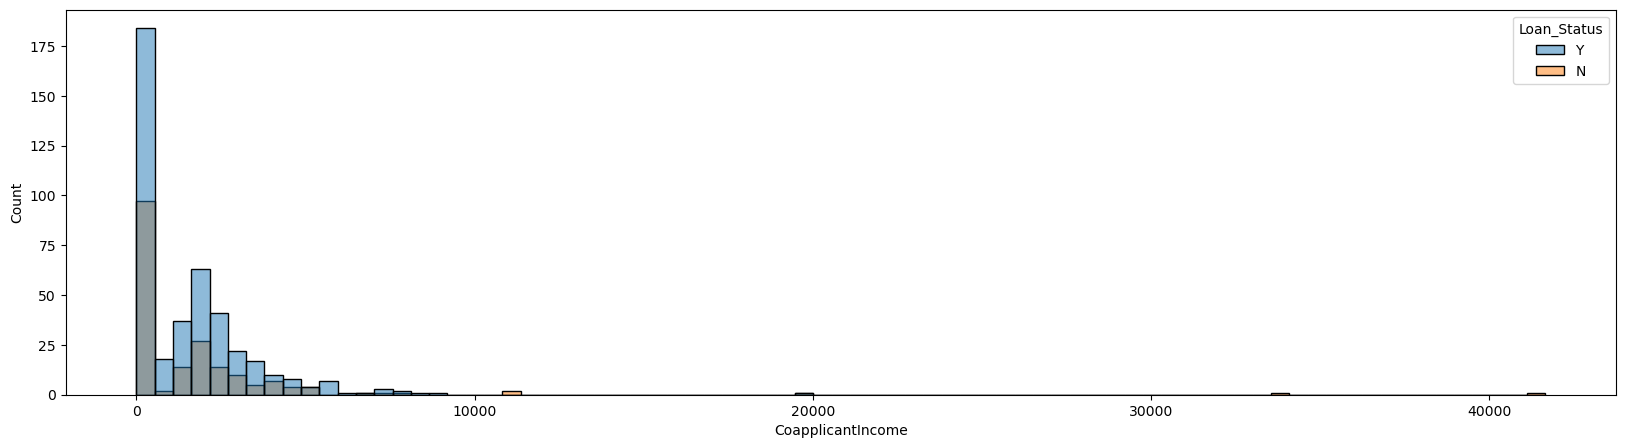

In [39]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='CoapplicantIncome',hue='Loan_Status')
plt.show()

Il est difficile de déterminer une relation entre la variable cible et le revenu du co-demandeur (CoapplicantIncome). Cependant, il est possible que cette variable ait un impact sur notre étude. Nous devrons vérifier cela de manière approfondie lors du prétraitement de nos données pour confirmer son influence potentielle.

#### .Relation entre Target/self_employed

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

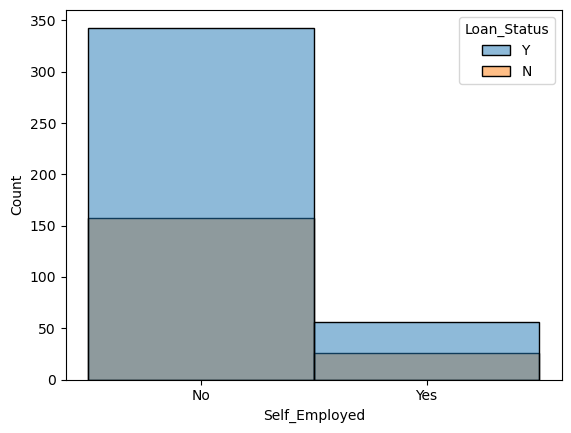

In [40]:
sns.histplot(data=df, x='Self_Employed',hue='Loan_Status')

In [41]:
df.groupby(['Self_Employed','Loan_Status'])['Loan_Status'].count()

Self_Employed  Loan_Status
No             N              157
               Y              343
Yes            N               26
               Y               56
Name: Loan_Status, dtype: int64

La variable "Self_Employed" semble avoir une influence limitée sur le statut du prêt. La plupart des demandeurs, qu'ils soient travailleurs indépendants ou non, ont vu leur prêt approuvé. Cependant, une analyse plus approfondie sera nécessaire pour confirmer cette observation et déterminer son impact réel sur le statut des prêts.

#### -Relation target/ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

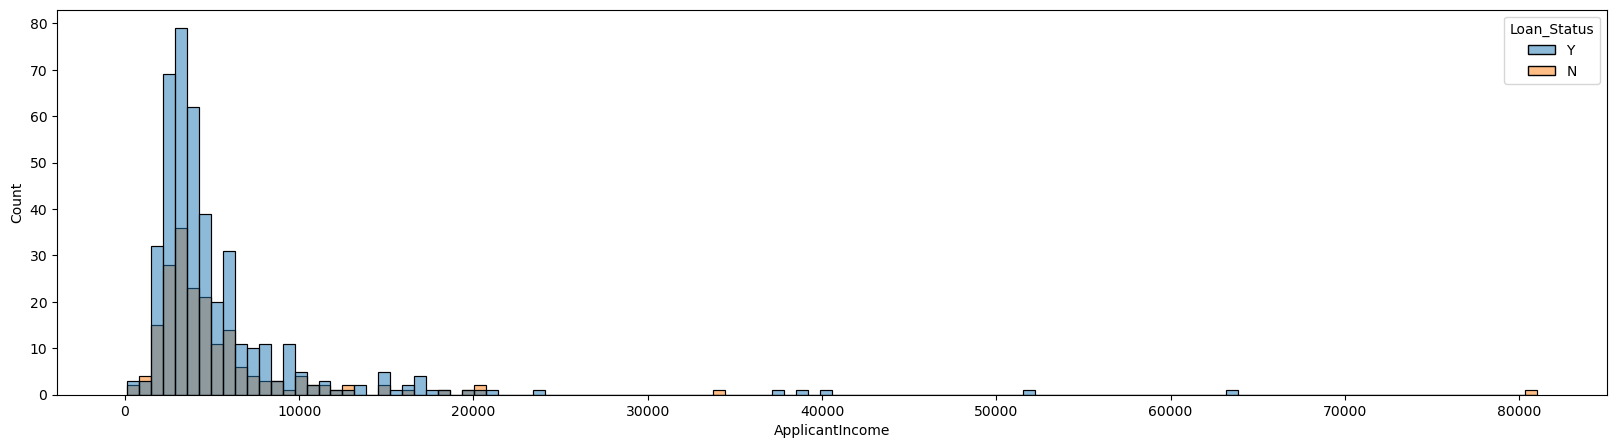

In [44]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,x='ApplicantIncome',hue="Loan_Status")


il est très difficile de deduire ou de poser une hypothèse trouvant une relation entre le target et la variable ApplicantIncome car les deux distribution sont presque les mêmes. De ce faite nous allons conserver par prudence notre variable pour la suite de notre treavail à moins d'avoir quel que chose de concrête lors du Prè-Traitement de nos donné grâce à la selection des meilleur variables


## 2. Pré-Traitement des données et Traitement de nos donéé

### -Imputation

In [46]:
df.dropna(axis=0,inplace=True)

In [47]:
# On elimine la colonne Loan_ID
df.drop('Loan_ID',axis=1,inplace=True)
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

### -Encodage

Nous utiliserons l'encodage pour convertir toutes les chaînes de caractères en valeurs numériques, simplifiant ainsi le traitement des données et permettant aux algorithmes d'apprentissage automatique de les comprendre plus facilement. Ce processus est essentiel pour garantir la cohérence des données et améliorer la précision de notre modèle d'analyse.

In [48]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y


In [50]:
df['Gender'].replace(['Male','Female'],[1,0],inplace=True)
df['Married'].replace(['Yes','No'],[1,0],inplace=True)
df['Education'].replace(['Graduate','Not Graduate'],[1,0],inplace=True)
df['Self_Employed'].replace(['Yes','No'],[1,0],inplace=True)
df['property_Area'].replace(['Urban','Rural','Semiurban'],[2,1,0],inplace=True)
df['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
df['Dependents'].replace('3+',31,inplace=True)

In [51]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
6,1,1,0,0,0,2333.0,1516.0,95.0,360.0,1.0,2,1
7,1,1,31,1,0,3036.0,2504.0,158.0,360.0,0.0,0,0


### Division de notre Dataset en donnée d'entrairement et en donnée de test, et entrainement de nos premier model


In [52]:
from sklearn.model_selection import train_test_split

nous allons d'abord utiliser le modele KNeighborsClassifier qui est un algorithme de classification basé sur les k pus proche voisin.
Cet algorithme predit un l'element en se basant sur une vote des elements les proches de ce dernier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
model.predict(x_test) 

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [63]:
model.score(x_test,y_test)

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6153846153846154

On a une Score de 61.5% avec le modele KNeighborsClassifier

utilisons le model LogisticRegression pour voir si on peut avoir une meilleur performance

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
mod=LogisticRegression()
mod.fit(x_train,y_train) 

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred=mod.predict(x_test)
accuracy_score(y_test,y_pred)

0.7412587412587412

on obtient une score de 74% avec le model de LogiticRegression meilleur que celle obtenu avec la methode de KNeighborsClassifier

#### Confusion_matrix donne une matrice dont les elements de la diagonale constitues les bonnes prediction des differentes classe et les autres elements qui ne sont pas dans le diagonale constitue les mauvaise prediction

On le test sur (143,) personne


<AxesSubplot:>

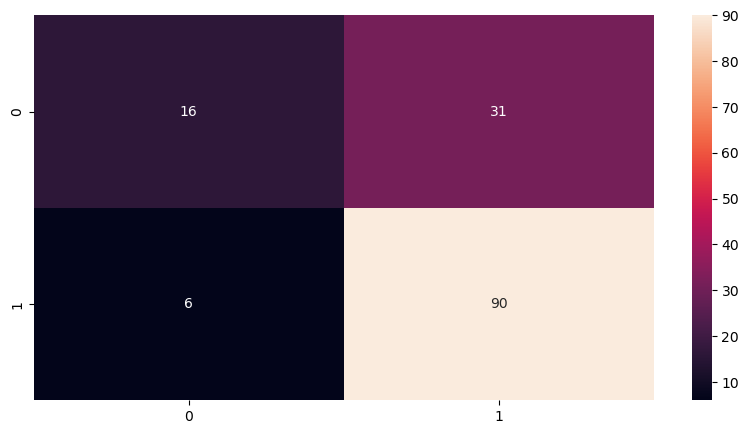

In [64]:
print('On le test sur',y_test.shape,'personne')
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

Nous observons un problème de prédiction dans la classe 0, où le modèle a fait 31 prédictions incorrectes sur les 47 échantillons. Nous nous efforcerons d'améliorer notre modèle afin d'obtenir de meilleures performances dans cette classe, en cherchant des moyens d'optimiser nos algorithmes et de mieux traiter les caractéristiques pertinentes. L'objectif est d'augmenter la précision globale du modèle, en particulier pour les cas où les prédictions sont actuellement moins précises.

================================================

Nous allons utiliser make_pipeline pour assembler plusieurs méthodes de prétraitement et les traiter conjointement. Nous inclurons StandardScaler dans le pipeline pour normaliser nos données. De plus, nous utiliserons PolynomialFeatures, un polynôme permettant de mieux classifier nos éléments et de réduire les erreurs, améliorant ainsi nos prédictions. Cette approche combinée de normalisation et de transformation polynomiale contribuera à obtenir des prédictions plus précises.

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [74]:
logisticregr=make_pipeline(StandardScaler(),PolynomialFeatures(4),LogisticRegression(random_state=0))

In [75]:
logisticregr.fit(x_train,y_train)
logisticregr.score(x_test,y_test)

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7342657342657343

On le test sur (143,) personne


<AxesSubplot:>

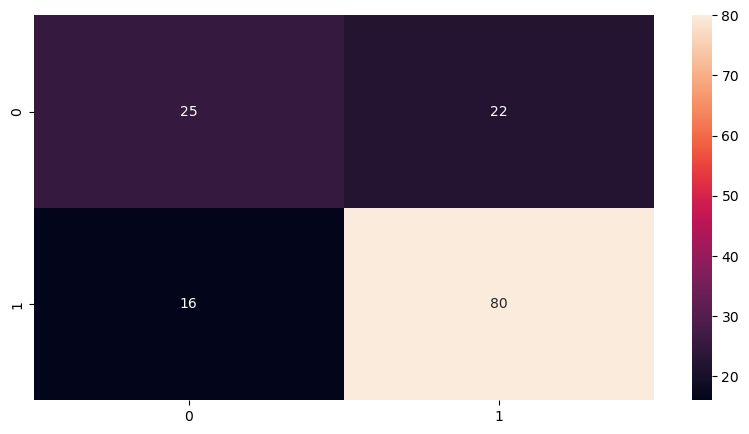

In [76]:
y_prede=logisticregr.predict(x_test)
print('On le test sur',y_test.shape,'personne')
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_prede),annot=True)

On a toujours pas une meilleure performance sur nos predictions

### Cherchons par un autre moyen une maniere de rendre plus performant notre modele

Important maintenant SelectKBest et le test de chi2 qui nous viennent du module sklearn.feature_selection,ils permettent de selection les meilleures variables

In [77]:
from sklearn.feature_selection import SelectKBest , chi2
chi2(x,y)

(array([3.55649079e-01, 2.23350307e+00, 1.02760691e-02, 4.51572287e-01,
        6.17270673e-01, 5.37884891e+03, 5.15757844e+03, 1.20401432e+02,
        3.92876753e-01, 1.97608217e+01, 6.03403505e+00]),
 array([5.50932612e-01, 1.35047357e-01, 9.19255998e-01, 5.01589245e-01,
        4.32063333e-01, 0.00000000e+00, 0.00000000e+00, 5.16714283e-28,
        5.30791121e-01, 8.77633484e-06, 1.40326194e-02]))

In [78]:
selector=SelectKBest(chi2,k=4)
selector.fit_transform(x,y)
selector.get_support()

array([False, False, False, False, False,  True,  True,  True, False,
        True, False])

les 4 meilleures variables selon le test sont: ApplicantIncome CoapplicantIncome LoanAmount Credit_History. Nous allons donc supprimé toute les autres variables pour voir si nous allons voir une meilleure performance


In [79]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1


In [81]:
df.drop(['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','property_Area'],axis=1,inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
2,3000.0,0.0,66.0,1.0,1
3,2583.0,2358.0,120.0,1.0,1
4,6000.0,0.0,141.0,1.0,1
6,2333.0,1516.0,95.0,1.0,1
7,3036.0,2504.0,158.0,0.0,0


In [82]:
c=df.drop('Loan_Status',axis=1)
d=df['Loan_Status']
c_train,c_test,d_train,d_test=train_test_split(c,d,test_size=0.3,random_state=0)
logisticregr.fit(c_train,d_train)
logisticregr.score(c_test,d_test)

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8041958041958042

Nous venons d'avoir la meilleure score(80%) depuis le debut de notre traitement, donc la selection de variable pése vraiment sur la performance de notre modele


On le test sur (143,) personne


<AxesSubplot:>

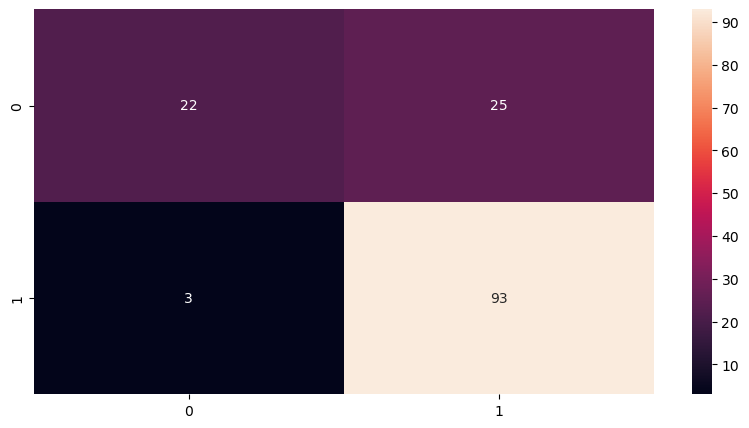

In [83]:
d_prede=logisticregr.predict(c_test)
print('On le test sur',d_test.shape,'personne')
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(d_test,d_prede),annot=True)

On a toujours un probleme sur la classe 0( les personnes ayant pas prêt) car sur les 47 qui devaient etre sur la classe 0, le modele en a fait 25 de maivais classement. Cela s'explique du fait que le modele c'est tres peu entrainer sur cette classe à cause du manque de donnée

### Maintenant nous alllons supprimer les valeures manquantes apres avoir selection les meilleures variables a fin d'avoir plus de données


In [85]:
dat=pd.read_csv("archive(4)/training_set.csv")
dat.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y


In [86]:
dat.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','property_Area'],axis=1,inplace=True)
dat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,5849.0,0.0,NaN,1.0,Y
1,NaN,1508.0,128.0,1.0,N
2,3000.0,0.0,66.0,1.0,Y
3,2583.0,2358.0,120.0,1.0,Y
4,6000.0,0.0,141.0,1.0,Y


In [87]:
dat['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
dat.dropna(axis=0,inplace=True)
dat.shape
(543, 5)
e=dat.drop('Loan_Status',axis=1)
f=dat['Loan_Status']
e_train,e_test,f_train,f_test=train_test_split(e,f,test_size=0.3,random_state=0)
logisticregr.fit(e_train,f_train)
logisticregr.score(e_test,f_test)

/home/mouhammed/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.808641975308642

On le test sur (162,) personne


<AxesSubplot:>

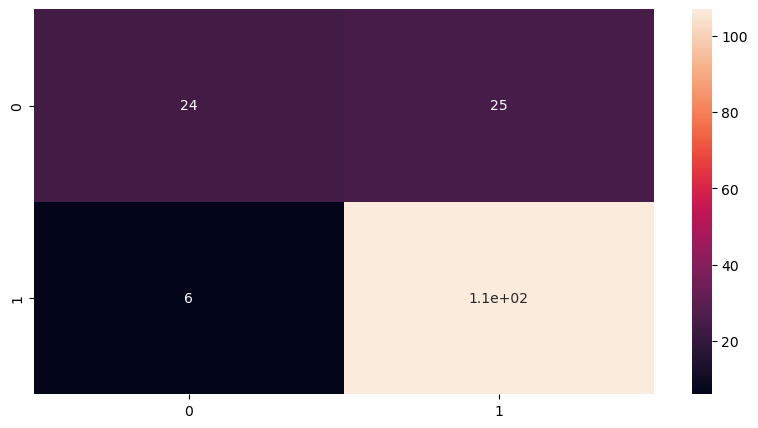

In [88]:
f_prede=logisticregr.predict(e_test)
print('On le test sur',f_test.shape,'personne')
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(f_test,f_prede),annot=True)

On obtient maintenant une score de 81% la meilleure score et que le modele arrive actuellement à faire une prediction de plus 50% sur la classe 0 chose qu'on a jamiais eu


### Finalement, nous avons obtenu un score de 81%. Cependant, il reste encore des possibilités d'amélioration du modèle, que ce soit en ajoutant des techniques de traitement supplémentaires ou en intégrant davantage de données pour renforcer la performance de nos prédictions.